In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyEMA

In [2]:
freq, H1_main = np.load("./data/acc_data.npy")

In [3]:
#Impact , accelerometer
FRF = H1_main[:,1,:]

freq = freq
acc = pyEMA.lscf(frf=FRF, 
                 freq=freq, 
                 lower=10, 
                 upper=5000,
                 pol_order_high=60)

d:\phdpy\pyEMA\pyEMA.py:204: RuntimeWarning: invalid value encountered in log
  poles = -np.log(sr) / self.sampling_time
d:\phdpy\pyEMA\pyEMA.py:440: RuntimeWarning: divide by zero encountered in true_divide
  xir = -sr.real/fr
d:\phdpy\pyEMA\pyEMA.py:537: RuntimeWarning: invalid value encountered in true_divide
  if np.abs((xi[i] - xi_temp[j, n-2])/xi_temp[j, n-2]) < err_xi:
d:\phdpy\pyEMA\pyEMA.py:537: RuntimeWarning: invalid value encountered in less
  if np.abs((xi[i] - xi_temp[j, n-2])/xi_temp[j, n-2]) < err_xi:
d:\phdpy\pyEMA\pyEMA.py:537: RuntimeWarning: invalid value encountered in subtract
  if np.abs((xi[i] - xi_temp[j, n-2])/xi_temp[j, n-2]) < err_xi:


To pick a pole press the MIDDLE mouse button.
To erase the last pick click the RIGHT mouse button.


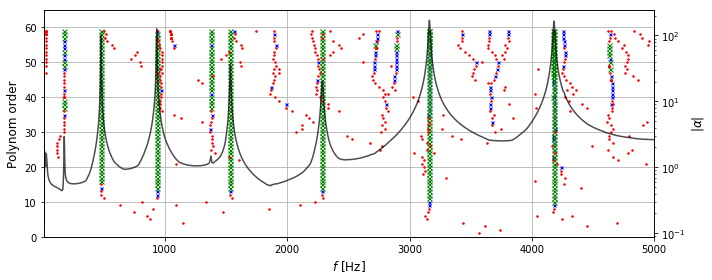

In [4]:
acc.get_poles()
acc.stab_chart(acc.all_poles, legend = False)

In [5]:
# Alternatively the frequencies can be defines as a list, e.g.:
n_freq =  [176,476,932,1534,2258,3161,4180]
acc.identification(n_freq)

In [6]:
# Reconstruction of FRF
frf_rec, modal_const = acc.lsfd(whose_poles='own', FRF_ind='all')

The selected natural frequencies and corresponding damping factors:

In [7]:
for i, (f, xi) in enumerate(zip(acc.nat_freq, acc.nat_xi),start = 1):
    print("f%s = %4.1f Hz, xi = %4.5f" % (i,f,xi))

f1 = 176.0 Hz, xi = 0.00872
f2 = 476.5 Hz, xi = 0.00193
f3 = 931.9 Hz, xi = 0.00135
f4 = 1534.6 Hz, xi = 0.00193
f5 = 2286.2 Hz, xi = 0.00281
f6 = 3161.2 Hz, xi = 0.00189
f7 = 4181.4 Hz, xi = 0.00144


Modal constants and residuals (last but one is the lower residual, last one is the upper residual):

In [8]:
acc.A[:,:3]

array([[  15.4380241   -50.05280119j,  153.44965354 -412.44922243j,
          53.80986911 -154.39060838j],
       [ -32.56111587  +15.37476292j, -306.1228734  +714.03734966j,
        -493.58591409+1577.11797896j],
       [  -3.04818585  +28.39984455j, -234.2034149  +451.81944352j,
         477.23221281-1025.459542j  ],
       [   1.21661084  +29.79726614j,  245.40266607 -441.89244595j,
         513.05214229-1032.52137285j],
       [   1.22870654   +4.74371005j,  357.88742971 -637.99091549j,
        -692.31731548+1364.48696309j],
       [   3.99326281  -36.37339484j, -189.04191462 +333.96066414j,
         100.93318374 -181.95783685j]])

Real part of modal constants:

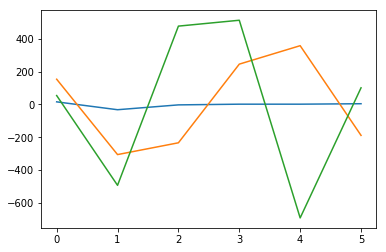

In [9]:
plt.plot(np.real(acc.A[:,:3]))

Showing the reconstructed FRF

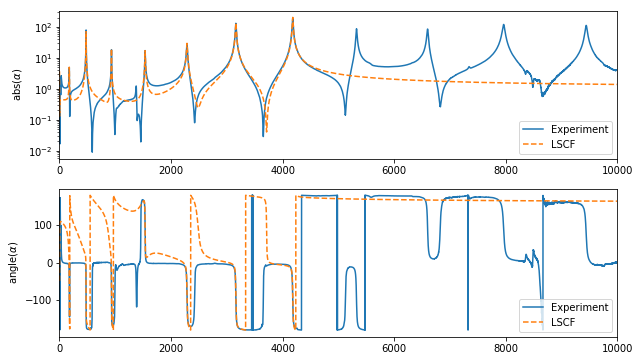

In [10]:
select_loc = 0

plt.figure(figsize = ((10,6)))
plt.subplot(211)

plt.semilogy(freq, np.abs(FRF[select_loc]), label='Experiment')
plt.semilogy(freq, np.abs(frf_rec[0]),'--', label='LSCF')
plt.xlim(0,freq[-1])
plt.ylabel(r"abs($\alpha$)")

plt.legend(loc = 'best')

plt.subplot(212)
plt.plot(freq, np.angle(FRF[select_loc],deg = 1), label='Experiment')
plt.plot(freq, np.angle(frf_rec[0],deg = 1),'--',label='LSCF')
plt.xlim(0,freq[-1])

plt.ylabel(r"angle($\alpha$)")
plt.legend(loc = 'best')